In [1]:
import eagleSqlTools as est
import numpy as np

In [2]:
conn = est.connect("lzm898", "YB854nic", "http://virgodb.dur.ac.uk:8080/MyMillennium")

In [3]:
query1="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e10 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [4]:
res1=est.execute_query(conn, query1)

In [5]:
np.save('res1.npy', res1)

In [6]:
xyzm = np.load('res1.npy')

In [7]:
s=len(xyzm)
halo_mass=np.zeros(s)
for i in range(s):
    halo_mass[i]=xyzm[i][3]
#print (halo_mass)
r_vec=np.zeros((s,3))
r_scal=np.zeros(s)
for i in range(s):
    r_scal[i]=np.sqrt(xyzm[i][0]**2+xyzm[i][1]**2+xyzm[i][2]**2)
    r_vec[i]=np.array([xyzm[i][0], xyzm[i][1], xyzm[i][2]])
acc_tot=0
acc_sca=np.zeros(s)
acc_scal=np.zeros(s)
G=4.301*10**(-9)
for i in range(s):
    acc_sca[i]=G*halo_mass[i]/(r_scal[i]**3)
    acc_scal[i]=acc_sca[i]/(3.08*10**19)*10**3
    acc_tot=acc_tot+acc_scal[i]*r_vec[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag=np.sqrt(acc_tot[0]**2+acc_tot[1]**2+acc_tot[2]**2)
#print(a_mag)

[-1.31789914e-13  1.33275476e-13  1.76494570e-14]


In [8]:
## we got total acceleration 10 times smaller than v_MW/age
#Let uscalculate the separate accelerations from each halos we took

In [9]:
a_cart=np.zeros((s,3))
for i in range(s):
    a_cart[i]=acc_scal[i]*r_vec[i]
#print (a_cart)
#print(a_cart.shape)

In [10]:
# now let us see hoe many halos give comparable acceleration to v_MW/age
#print(a_cart)
k=0
#print(a_cart)
for i in range(s):
    if np.sqrt(a_cart[i][0]**2+a_cart[i][1]**2+a_cart[i][2]**2)>=a:
        k=k+1
print(k)

0


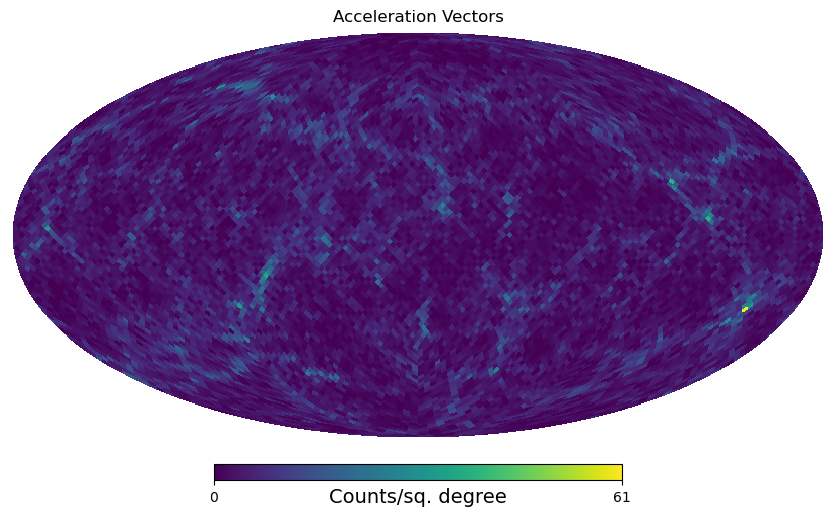

In [11]:
#putting already known acceleration vectors


import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside = 32
npix = hp.nside2npix(Nside)
vecs = a_cart
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices=hp.pixelfunc.vec2pix(Nside, list(vecs[:,0]*u.dimensionless_unscaled),
        list(vecs[:,1]*u.dimensionless_unscaled),
        list(vecs[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
counts, _ = np.histogram(pix_indices, bins=hp.nside2npix(Nside), weights=None)

# Plot the skymap
hp.mollview(counts, title='Acceleration Vectors', unit='Counts/sq. degree')



In [12]:
a_r=np.zeros(s)
for i in range(s):
    a_r[i]=np.sqrt(a_cart[i][0]**2+a_cart[i][1]**2+a_cart[i][2]**2)

In [13]:
theta=np.zeros(s)
phi=np.zeros(s)
for i in range(s):
    theta[i]=np.arctan(a_cart[i][1]/a_cart[i][0])
    phi[i]=np.arccos(a_cart[i][2]/a_r[i])

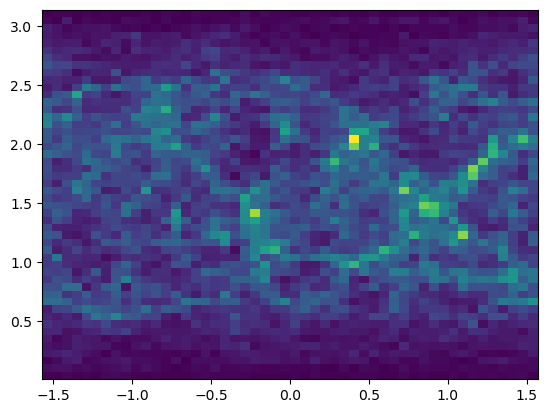

In [14]:
plt.hist2d(theta, phi, bins=(50, 50))
plt.show()

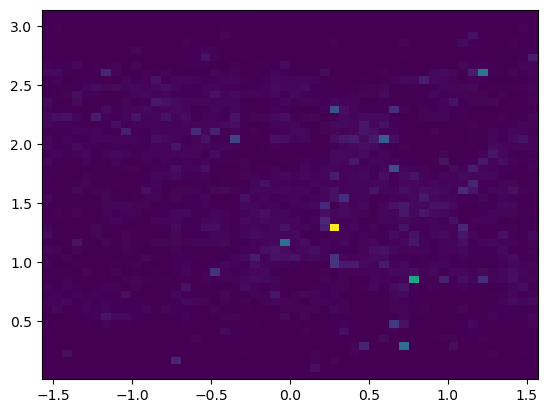

In [15]:
plt.hist2d(theta, phi, bins=(50, 50), weights=a_r)
plt.show()

In [16]:
##Now let us change the mass constraint and get halos for galaxies for which mstars_bulge+mstars_disk >=3*10^10

In [17]:
query2="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >3*1e10 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [18]:
res2=est.execute_query(conn, query2)

In [19]:
np.save('res2.npy', res2)

In [20]:
xyzm2 = np.load('res2.npy')

In [21]:
s2=len(xyzm2)
halo_mass2=np.zeros(s2)
for i in range(s2):
    halo_mass2[i]=xyzm2[i][3]
#print (halo_mass)
r_vec2=np.zeros((s2,3))
r_scal2=np.zeros(s2)
for i in range(s2):
    r_scal2[i]=np.sqrt(xyzm2[i][0]**2+xyzm2[i][1]**2+xyzm2[i][2]**2)
    r_vec2[i]=np.array([xyzm2[i][0], xyzm2[i][1], xyzm2[i][2]])
acc_tot2=0
acc_sca2=np.zeros(s2)
acc_scal2=np.zeros(s2)
G=4.301*10**(-9)
for i in range(s2):
    acc_sca2[i]=G*halo_mass2[i]/(r_scal2[i]**3)
    acc_scal2[i]=acc_sca2[i]/(3.08*10**19)*10**3
    acc_tot2=acc_tot2+acc_scal2[i]*r_vec2[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot2)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag2=np.sqrt(acc_tot2[0]**2+acc_tot2[1]**2+acc_tot2[2]**2)
#print(a_mag)

[-1.37227215e-13  1.07164030e-13 -4.46674216e-14]


In [22]:
a_cart2=np.zeros((s2,3))
for i in range(s2):
    a_cart2[i]=acc_scal2[i]*r_vec2[i]

In [23]:
k2=0
#print(a_cart)
for i in range(s2):
    if np.sqrt(a_cart2[i][0]**2+a_cart2[i][1]**2+a_cart2[i][2]**2)>=a:
        k2=k2+1
print(k2)

0


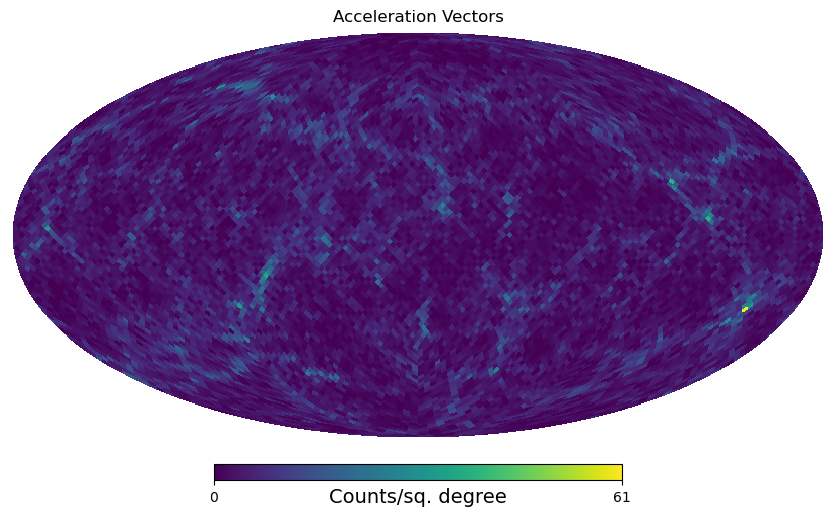

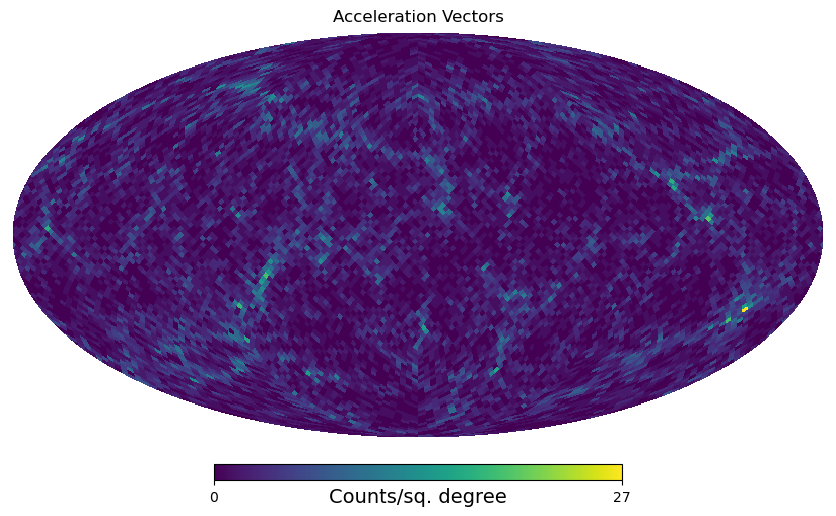

In [24]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside2 = 32
npix2 = hp.nside2npix(Nside2)
vecs2 = a_cart2
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices2=hp.pixelfunc.vec2pix(Nside2, list(vecs2[:,0]*u.dimensionless_unscaled),
        list(vecs2[:,1]*u.dimensionless_unscaled),
        list(vecs2[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
counts2, _ = np.histogram(pix_indices2, bins=hp.nside2npix(Nside2), weights=None)

# Plot the skymap
hp.mollview(counts, title='Acceleration Vectors', unit='Counts/sq. degree')
hp.mollview(counts2, title='Acceleration Vectors', unit='Counts/sq. degree')

In [25]:
a_r2=np.zeros(s2)
for i in range(s2):
    a_r2[i]=np.sqrt(a_cart2[i][0]**2+a_cart2[i][1]**2+a_cart2[i][2]**2)

In [26]:
theta2=np.zeros(s2)
phi2=np.zeros(s2)
for i in range(s2):
    theta2[i]=np.arctan(a_cart2[i][1]/a_cart2[i][0])
    phi2[i]=np.arccos(a_cart2[i][2]/a_r2[i])

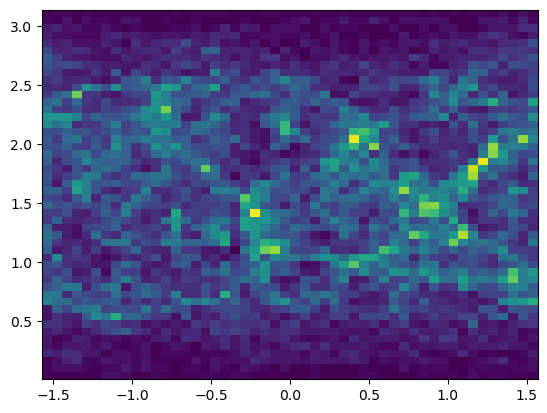

In [27]:
plt.hist2d(theta2, phi2, bins=(50, 50))
plt.show()

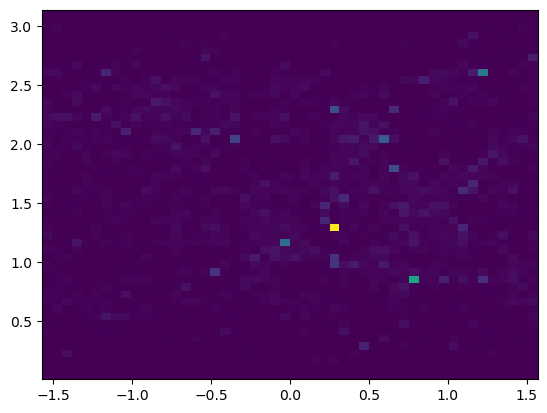

In [28]:
plt.hist2d(theta2, phi2, bins=(50, 50), weights=a_r2)
plt.show()

In [29]:
##Let us do another constraint, mstars_bulge+mstars_disk>=10^11

In [30]:
query3="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e3 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [31]:
res3=est.execute_query(conn, query3)

In [32]:
np.save('res3.npy', res3)

In [33]:
xyzm3 = np.load('res3.npy')

In [46]:
s3=len(xyzm3)
halo_mass3=np.zeros(s3)
for i in range(s3):
    halo_mass3[i]=xyzm3[i][3]
#print (halo_mass)
r_vec3=np.zeros((s3,3))
r_scal3=np.zeros(s3)
for i in range(s3):
    r_scal3[i]=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)
    r_vec3[i]=np.array([xyzm3[i][0], xyzm3[i][1], xyzm3[i][2]])
acc_tot3=0
acc_sca3=np.zeros(s3)
acc_scal3=np.zeros(s3)
G=4.301*10**(-9)
for i in range(s3):
    acc_sca3[i]=G*halo_mass3[i]/(r_scal3[i]**3)
    acc_scal3[i]=acc_sca3[i]/(3.08*10**19)*10**3
    acc_tot3=acc_tot3+acc_scal3[i]*r_vec3[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot3)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag3=np.sqrt(acc_tot3[0]**2+acc_tot3[1]**2+acc_tot3[2]**2)
#print(a_mag)

[-4.74071290e-14  3.20157451e-13  2.54815890e-13]


In [129]:
a_cart3=np.zeros((s3,3))
for i in range(s3):
    a_cart3[i]=acc_scal3[i]*r_vec3[i]
#print (a_cart)
#print(a_cart.shape)
print(acc_sca[4071])

0.007099570052573757


In [48]:
# now let us see hoe many halos give comparable acceleration to v_MW/age
#print(a_cart)
k3=0
#print(a_cart)
for i in range(s3):
    if np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)>=a:
        k3=k3+1
print(k)

0


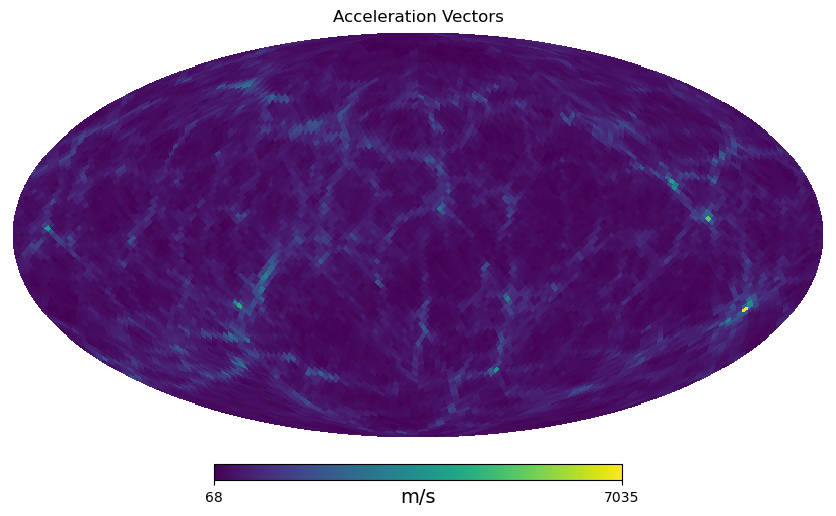

In [49]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside3 = 32
npix3 = hp.nside2npix(Nside3)
vecs3 = a_cart3
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices3=hp.pixelfunc.vec2pix(Nside3, list(vecs3[:,0]*u.dimensionless_unscaled),
        list(vecs3[:,1]*u.dimensionless_unscaled),
        list(vecs3[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
bins=hp.nside2npix(Nside3)
counts3, _ = np.histogram(pix_indices3, bins, weights=None)

# Plot the skymap
hp.mollview(counts3, title='Acceleration Vectors', unit='m/s')

In [50]:
print(pix_indices3)
print(a_cart3)

[5522 5522 2476 ... 1460 1062 1358]
[[-2.88672652e-22 -3.52694952e-22  5.44164537e-23]
 [-3.74975485e-22 -4.57699894e-22  6.29487151e-23]
 [ 1.53642541e-21 -2.28438586e-21  1.99132494e-21]
 ...
 [-6.64717552e-21 -1.00419745e-21  8.04026629e-21]
 [-3.92860452e-21 -1.22447300e-21  5.93445555e-21]
 [-4.41095481e-21 -1.67724171e-21  5.89314394e-21]]


In [51]:
##Now let us plot the 2D histogram depended on angles yheta and phi
# phi=arctan(y/x), theta=arccos(z/r)
# we have our magnitude of acceer

In [52]:
a_r3=np.zeros(s3)
for i in range(s3):
    a_r3[i]=np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)
print(a_r3)

[4.59006296e-22 5.95028023e-22 3.39770464e-21 ... 1.04804216e-20
 7.22156702e-21 7.54975546e-21]


In [55]:
print(a_r3)

[4.59006296e-22 5.95028023e-22 3.39770464e-21 ... 1.04804216e-20
 7.22156702e-21 7.54975546e-21]


In [127]:
theta3=np.zeros(s3)
phi3=np.zeros(s3)
for i in range(4071):
    #print(a_cart3[i][1]/a_cart3[i][0])
    theta3[i]=np.arctan(a_cart3[i][1]/a_cart3[i][0])
    #phi3[i]=np.arccos(a_cart3[i][2]/a_r3[i])
#print(theta3[5000])
#print(phi3)
print (a_cart3[4071][0])

-0.0


/var/folders/t1/0d67g5dx15v4hv9sk_g2cx1c0000gp/T/ipykernel_21471/2109964996.py:5: RuntimeWarning: invalid value encountered in double_scalars
  theta3[i]=np.arctan(a_cart3[i][1]/a_cart3[i][0])


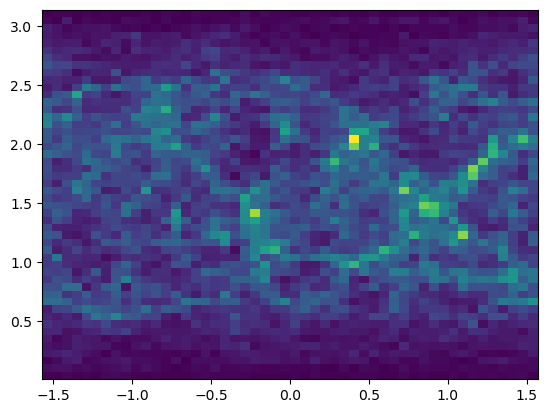

In [61]:
plt.hist2d(theta, phi, bins=(50, 50))
plt.show()

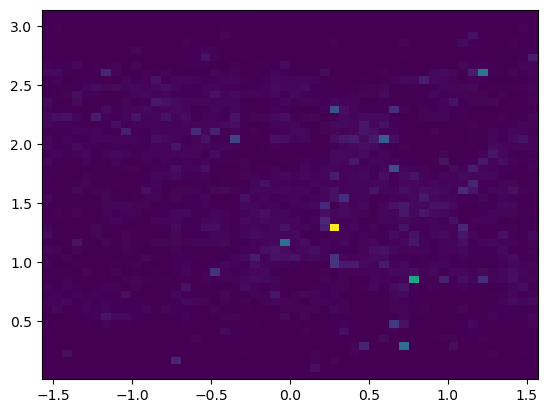

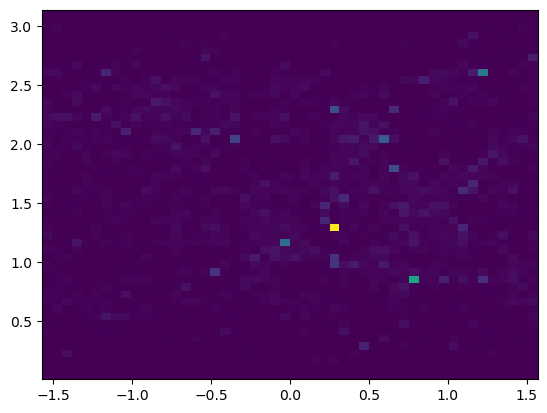

In [135]:
#this is plot taking into acount. the values 

plt.hist2d(theta, phi, bins=(50, 50), weights=a_r)
plt.show()
plt.hist2d(theta2, phi2, bins=(50, 50), weights=a_r2)
plt.show()

In [134]:
print(a_r)
print(a_r2)

[5.07012986e-18 1.36248428e-16 3.04955965e-17 ... 2.98349931e-18
 3.86505068e-18 1.71422821e-18]
[8.32011115e-18 9.32531230e-18 8.09322589e-17 ... 5.00360438e-17
 2.22146927e-17 1.46540052e-17]
